In [29]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
OUT_DIR = "S01"
os.makedirs(OUT_DIR, exist_ok=True)

In [31]:
BASE_DIR = Path.cwd()  # Current directory of the running file
DATA_DIR = BASE_DIR.parent / "T03_af"
CURRENT_DIR = BASE_DIR

In [32]:
with open(DATA_DIR / "S10_af_time_series.pkl", "rb") as f:
    data = pickle.load(f)

measurements = data["data"]
infos = pd.read_excel(DATA_DIR / "S16_af_info.xlsx")

In [33]:
infos

,sample_no,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,...,LOC4_idx,LOC5_time,LOC5_Fz,LOC5_idx,LOC6_time,LOC6_Fz,LOC6_idx,LOC7_time,LOC7_Fz,LOC7_idx
0,1,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10356,118.560000,1.955412,11856,133.560000,1.987789,13356,148.560000,2.062822,14856
1,2,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 2.dwd,Sample 2.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10762,122.620000,1.798143,12262,137.620000,1.866014,13762,152.620000,1.937174,15262
2,3,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 3.dwd,Sample 3.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,11324,128.240000,1.864614,12824,143.240000,1.914791,14324,158.240000,1.938849,15824
3,4,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 4.dwd,Sample 4.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9235,105.211429,1.884570,10521,118.068571,1.940492,11807,130.925714,2.004096,13093
4,5,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 5.dwd,Sample 5.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9816,111.021429,1.482512,11102,123.878571,1.501797,12388,136.735714,1.523190,13674
5,6,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 6.dwd,Sample 6.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9937,112.231429,1.391324,11223,125.088571,1.414208,12509,137.945714,1.392280,13795
6,7,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 7.dwd,Sample 7.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,8324,94.490000,1.727454,9449,105.740000,1.824198,10574,116.990000,1.864062,11699
7,8,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 8.dwd,Sample 8.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,8965,100.900000,1.458888,10090,112.150000,1.585516,11215,123.400000,1.611573,12340
8,9,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 9.dwd,Sample 9.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9662,107.870000,1.663417,10787,119.120000,1.745621,11912,130.370000,1.794847,13037
9,10,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10032,115.320000,1.520111,11532,130.320000,1.587619,13032,145.320000,1.711081,14532


In [34]:
# Calculate value of location
rolling_window = 30
df_arr = []
for sample_no in infos["sample_no"].values:
    # Load data from dataframes
    measure = measurements.loc[measurements["sample_no"] == sample_no].reset_index(
        drop=True
    )
    info = infos[infos["sample_no"] == sample_no].iloc[0]
    measure.set_index("Time", inplace=True)
    cols_loc_idx = [f"LOC{i}_idx" for i in range(1, 8)]
    cols_loc_time = [f"LOC{i}_time" for i in range(1, 8)]
    loc_time_idxs = info[cols_loc_idx].values
    loc_time = info[cols_loc_time].values
    af_mean = measure.rolling(window=rolling_window).mean().interpolate()
    loc_fx = af_mean["Fx"].iloc[loc_time_idxs].values
    loc_fy = af_mean["Fy"].iloc[loc_time_idxs].values
    loc_fz = af_mean["Fz"].iloc[loc_time_idxs].values
    loc_mz = af_mean["Mz"].iloc[loc_time_idxs].values

    _df = pd.DataFrame(
        {
            "sample_no": sample_no,
            "Location": [i for i in range(1, 8)],
            "Fx": loc_fx,
            "Fy": loc_fy,
            "Fz": loc_fz,
            "Mz": loc_mz,
            "loc_idx": loc_time_idxs,
            "loc_time": loc_time,
        }
    )
    df_arr.append(_df)
info_locs = pd.concat(df_arr).reset_index(drop=True)
info_locs

,sample_no,Location,Fx,Fy,Fz,Mz,loc_idx,loc_time
0,1,1,-0.077671,0.143026,1.244326,1.873865,5856,58.56
1,1,2,-0.027450,0.207481,1.625039,4.615337,7356,73.56
2,1,3,-0.038704,0.272508,1.799653,5.209334,8856,88.56
3,1,4,-0.023484,0.278517,1.882699,5.764727,10356,103.56
4,1,5,-0.038251,0.280276,1.955412,6.097497,11856,118.56
...,...,...,...,...,...,...,...,...
373,54,3,-0.079764,0.196450,1.352393,5.512565,8631,86.31
374,54,4,-0.091477,0.259717,1.529089,6.898179,9756,97.56
375,54,5,-0.068128,0.241906,1.657737,7.940597,10881,108.81
376,54,6,-0.066880,0.261006,1.712860,8.849661,12006,120.06


## Prototype


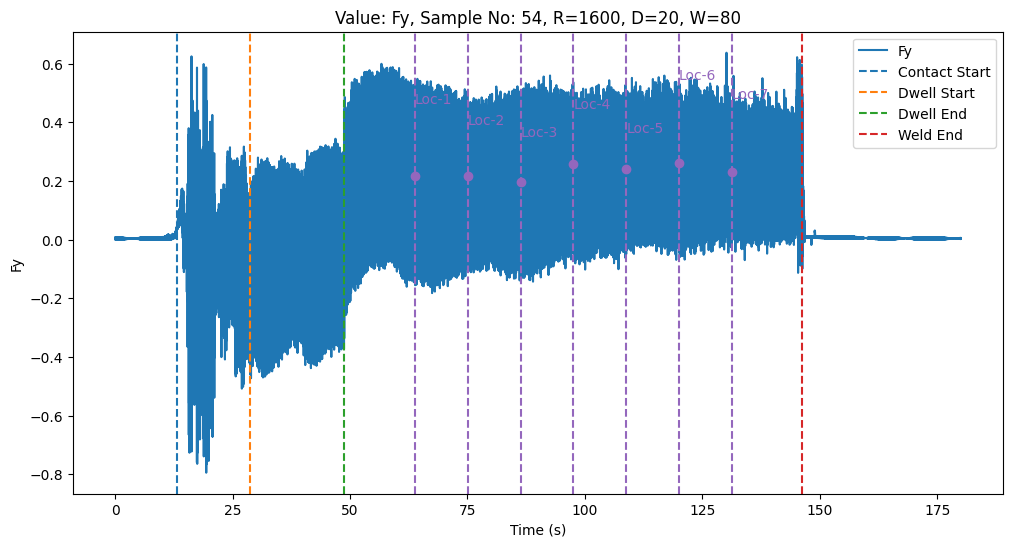

In [35]:
sample_no = 54
# measure_type = "Fx"
measure_type = "Fy"
# measure_type = "Fz"
# measure_type = "Mz"


cp = sns.color_palette(n_colors=5)
measure = measurements.loc[measurements["sample_no"] == sample_no].reset_index(
    drop=True
)
info = infos[infos["sample_no"] == sample_no].iloc[0]
info_loc = info_locs[info_locs["sample_no"] == sample_no][
    ["Location", "loc_time", "loc_idx", measure_type]
]
measure.set_index("Time", inplace=True)
af = measure[measure_type]
R = info["R"]
D = info["D"]
W = info["W"]
loc_vals = info_loc[measure_type].values
loc_idxs = info_loc["loc_idx"].values
loc_times = info_loc["loc_time"].values


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(af.index, af.values, label=f"{measure_type}")
ax.axvline(
    info["contact_time_start"], color=cp[0], linestyle="--", label="Contact Start"
)
ax.axvline(info["dwell_time_start"], color=cp[1], linestyle="--", label="Dwell Start")
ax.axvline(info["dwell_time_end"], color=cp[2], linestyle="--", label="Dwell End")
ax.axvline(info["weld_time_end"], color=cp[3], linestyle="--", label="Weld End")

for i in range(1, 8):
    loc_idx = loc_idxs[i - 1]
    loc_val = loc_vals[i - 1]
    loc_time = loc_times[i - 1]
    ax.axvline(loc_time, color=cp[4], linestyle="--")
    ax.text(
        loc_time,
        af.iloc[loc_idx] + af.max() * 0.2,
        f"Loc-{i}",
        verticalalignment="center",
        color=cp[4],
        clip_on=True,
    )
    ax.plot(
        measure.index[loc_idx],
        loc_val,
        marker="o",
        color=cp[4],
    )

ax.set_title(f"Value: {measure_type}, Sample No: {sample_no}, R={R}, D={D}, W={W}")
ax.set_xlabel("Time (s)")
ax.set_ylabel(f"{measure_type}")
ax.legend()
plt.show()


## Function


In [36]:
def plot_measurement_with_locc(sample_no, measure_type, file_prefix="S01"):
    # sample_no = 54
    # measure_type = "Fx"
    # measure_type = "Fy"
    # measure_type = "Fz"
    # measure_type = "Mz"

    cp = sns.color_palette(n_colors=5)
    measure = measurements.loc[measurements["sample_no"] == sample_no].reset_index(
        drop=True
    )
    info = infos[infos["sample_no"] == sample_no].iloc[0]
    info_loc = info_locs[info_locs["sample_no"] == sample_no][
        ["Location", "loc_time", "loc_idx", measure_type]
    ]
    measure.set_index("Time", inplace=True)
    af = measure[measure_type]
    R = info["R"]
    D = info["D"]
    W = info["W"]
    loc_vals = info_loc[measure_type].values
    loc_idxs = info_loc["loc_idx"].values
    loc_times = info_loc["loc_time"].values

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(af.index, af.values, label=f"{measure_type}")
    ax.axvline(
        info["contact_time_start"], color=cp[0], linestyle="--", label="Contact Start"
    )
    ax.axvline(
        info["dwell_time_start"], color=cp[1], linestyle="--", label="Dwell Start"
    )
    ax.axvline(info["dwell_time_end"], color=cp[2], linestyle="--", label="Dwell End")
    ax.axvline(info["weld_time_end"], color=cp[3], linestyle="--", label="Weld End")

    for i in range(1, 8):
        loc_idx = loc_idxs[i - 1]
        loc_val = loc_vals[i - 1]
        loc_time = loc_times[i - 1]
        ax.axvline(loc_time, color=cp[4], linestyle="--")
        ax.text(
            loc_time,
            af.iloc[loc_idx] + af.max() * 0.2,
            f"Loc-{i}",
            verticalalignment="center",
            color=cp[4],
            clip_on=True,
        )
        ax.plot(
            measure.index[loc_idx],
            loc_val,
            marker="o",
            color=cp[4],
        )

    ax.set_title(f"Value: {measure_type}, Sample No: {sample_no}, R={R}, D={D}, W={W}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel(f"{measure_type}")
    ax.legend()
    fig.savefig(
        f"{OUT_DIR}/{file_prefix}_S{sample_no}_{measure_type}.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.close(fig)
    print(f"Saved plot for sample_no: {sample_no}")


In [37]:
from itertools import product

sample_nos = measurements["sample_no"].unique().tolist()
measure_types = ["Fx", "Fy", "Fz", "Mz"]
for sample_no, measure_type in product(sample_nos, measure_types):
    print(f"Plotting sample_no: {sample_no}, measure_type: {measure_type}")
    plot_measurement_with_locc(sample_no, measure_type)

Plotting sample_no: 1, measure_type: Fx
Saved plot for sample_no: 1
Plotting sample_no: 1, measure_type: Fy
Saved plot for sample_no: 1
Plotting sample_no: 1, measure_type: Fz
Saved plot for sample_no: 1
Plotting sample_no: 1, measure_type: Mz
Saved plot for sample_no: 1
Plotting sample_no: 10, measure_type: Fx
Saved plot for sample_no: 10
Plotting sample_no: 10, measure_type: Fy
Saved plot for sample_no: 10
Plotting sample_no: 10, measure_type: Fz
Saved plot for sample_no: 10
Plotting sample_no: 10, measure_type: Mz
Saved plot for sample_no: 10
Plotting sample_no: 11, measure_type: Fx
Saved plot for sample_no: 11
Plotting sample_no: 11, measure_type: Fy
Saved plot for sample_no: 11
Plotting sample_no: 11, measure_type: Fz
Saved plot for sample_no: 11
Plotting sample_no: 11, measure_type: Mz
Saved plot for sample_no: 11
Plotting sample_no: 12, measure_type: Fx
Saved plot for sample_no: 12
Plotting sample_no: 12, measure_type: Fy
Saved plot for sample_no: 12
Plotting sample_no: 12, meas